## Proyecto: Aprendizaje Automatizado

### Exploración de la metodología

**Ejercicio 1.** Probar tutorial de https://scipy-lectures.org/packages/scikit-learn/auto_examples/plot_digits_simple_classif.html

**Ejercicio 2.** Usar *reducción de dimensionalidad*, como PCA y explicarlo

**Ejercicio 3.** Usar otros métodos de reducción de dimensionalidad y comparar

otros métodos:

    - random projection (sklearn.random_projection)
    - feature agglomeration (sklearn.cluster.featureAgglomeration)

### Clasificación de números

**Ejercicio 4.** Implementar clasificadores para la base de datos y explicar. Usar matriz de confusión y esas cosas. Usar http://yann.lecun.com/exdb/mnist/

- están listos los datos, falta implementar

### Desbalanceo de letras

(ver https://www.nist.gov/itl/products-and-services/emnist-dataset , https://arxiv.org/pdf/1702.05373v1.pdf)

```
usar “start “” “%PROGRAMFILES%\Git\bin\sh.exe” –login” para abrir git bash
$git lfs track "*.extencion"
```

**Ejercicio 5.** Explicar el impacto del desbalance en el desempeño de los clasificadores. Investigar formas para mejorar los algorítmos.

- leer el paper
- probar dataset balanceado y sin balancear


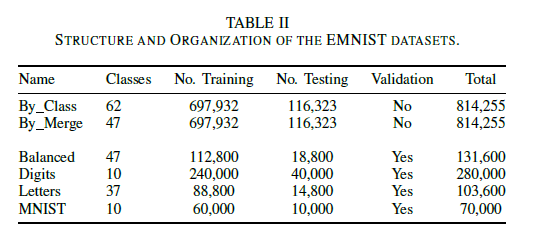

In [12]:
import gzip
import numpy as np
from matplotlib import pyplot as plt
from PIL import ImageOps, Image
import PIL

In [2]:
# Balanced

with gzip.open('./gzip/emnist-balanced-test-images-idx3-ubyte.gz', 'rb') as f:
    rbal_test_im = f.read()
    
with gzip.open('./gzip/emnist-balanced-test-labels-idx1-ubyte.gz', 'rb') as f:
    rbal_test_lb = f.read()
    
with gzip.open('./gzip/emnist-balanced-train-images-idx3-ubyte.gz', 'rb') as f:
    rbal_train_im = f.read()
    
with gzip.open('./gzip/emnist-balanced-train-labels-idx1-ubyte.gz', 'rb') as f:
    rbal_train_lb = f.read()

# byClass

with gzip.open('./gzip/emnist-byclass-test-images-idx3-ubyte.gz', 'rb') as f:
    rclass_test_im = f.read()
    
with gzip.open('./gzip/emnist-byclass-test-labels-idx1-ubyte.gz', 'rb') as f:
    rclass_test_lb = f.read()
    
with gzip.open('./gzip/emnist-byclass-train-images-idx3-ubyte.gz', 'rb') as f:
    rclass_train_im = f.read()
    
with gzip.open('./gzip/emnist-byclass-train-labels-idx1-ubyte.gz', 'rb') as f:
    rclass_train_lb = f.read()

# byMerge

with gzip.open('./gzip/emnist-bymerge-test-images-idx3-ubyte.gz', 'rb') as f:
    rmerge_test_im = f.read()
    
with gzip.open('./gzip/emnist-bymerge-test-labels-idx1-ubyte.gz', 'rb') as f:
    rmerge_test_lb = f.read()
    
with gzip.open('./gzip/emnist-bymerge-train-images-idx3-ubyte.gz', 'rb') as f:
    rmerge_train_im = f.read()
    
with gzip.open('./gzip/emnist-bymerge-train-labels-idx1-ubyte.gz', 'rb') as f:
    rmerge_train_lb = f.read()

### Balanced

In [35]:
aux1 = list(rbal_test_im)
del aux1[:16]

bal_test_im = []
for i in range(18_800):
    im = aux1[:784]
    im = np.array(im).reshape((28,28))
    im = Image.fromarray(im)
    im = ImageOps.flip(im)
    im = im.rotate(90)
    bal_test_im.append(np.array(im).reshape(1,784))
    del aux1[:784]

bal_test_im = np.concatenate(bal_test_im, axis=0)

np.savetxt('./csv/bal_test_im.csv', bal_test_im, delimiter=',')

In [26]:
# aux2 = list(rbal_test_lb)
# del aux2[:8]

# bal_test_lb = []
# for i in range(18_800):
#     im = aux2[i]
#     bal_test_lb.append(np.array(im))

# np.savetxt('./csv/bal_test_lb.csv', bal_test_lb, delimiter=',')

In [3]:
aux3 = list(rbal_train_im)
del aux3[:16]

bal_train_im = []
for i in range(112_800):
    im = aux3[:784]
    im = np.array(im).reshape((28,28))
    im = Image.fromarray(im)
    im = ImageOps.flip(im)
    im = im.rotate(90)
    bal_train_im.append(np.array(im).reshape(1,784))
    del aux3[:784]

bal_train_im = np.concatenate(bal_train_im, axis=0)

np.savetxt('./csv/bal_train_im.csv', bal_train_im, delimiter=',')

KeyboardInterrupt: 

In [37]:
# aux4 = list(rbal_train_lb)
# del aux4[:8]

# bal_train_lb = []
# for i in range(112_800):
#     im = aux4[i]
#     bal_train_lb.append(np.array(im))

# np.savetxt('./csv/bal_train_lb.csv', bal_train_lb, delimiter=',')

### By_Class

In [ ]:
aux5 = list(rclass_test_im)
del aux5[:16]

class_test_im = []
for i in range(116_323):
    im = aux5[:784]
    class_test_im.append(np.array(im))
    del aux5[:784]

np.savetxt('./csv/class_test_im.csv', class_test_im, delimiter=',')

In [38]:
# aux6 = list(rclass_test_lb)
# del aux6[:8]

# class_test_lb = []
# for i in range(116_323):
#     im = aux6[i]
#     class_test_lb.append(np.array(im))

# np.savetxt('./csv/class_test_lb.csv', class_test_lb, delimiter=',')

In [ ]:
aux7 = list(rclass_train_im)
del aux7[:16]

class_train_im = []
for i in range(697_932):
    im = aux7[:784]
    class_train_im.append(np.array(im))
    del aux7[:784]

np.savetxt('./csv/class_train_im.csv', class_train_im, delimiter=',')

In [39]:
# aux8 = list(rclass_train_lb)
# del aux8[:8]

# class_train_lb = []
# for i in range(697_932):
#     im = aux8[i]
#     class_train_lb.append(np.array(im))

# np.savetxt('./csv/class_train_lb.csv', class_train_lb, delimiter=',')

### By_Merge

In [ ]:
aux9 = list(rmerge_test_im)
del aux9[:16]

merge_test_im = []
for i in range(116_323):
    im = aux9[:784]
    merge_test_im.append(np.array(im))
    del aux9[:784]

np.savetxt('./csv/merge_test_im.csv', merge_test_im, delimiter=',')

In [40]:
# aux10 = list(rclass_test_lb)
# del aux10[:8]

# merge_test_lb = []
# for i in range(116_323):
#     im = aux10[i]
#     merge_test_lb.append(np.array(im))

# np.savetxt('./csv/merge_test_lb.csv', merge_test_lb, delimiter=',')

In [ ]:
aux11 = list(rmerge_train_im)
del aux11[:16]

merge_train_im = []
for i in range(697_932):
    im = aux11[:784]
    merge_train_im.append(np.array(im))
    del aux11[:784]

np.savetxt('./csv/merge_train_im.csv', merge_train_im, delimiter=',')

In [41]:
# aux12 = list(rmerge_train_lb)
# del aux12[:8]

# merge_train_lb = []
# for i in range(697_932):
#     im = aux12[i]
#     merge_train_lb.append(np.array(im))

# np.savetxt('./csv/merge_train_lb.csv', merge_train_lb, delimiter=',')

### Cargar

In [33]:
bal_test_im = np.loadtxt('./csv/bal_test_im.csv', delimiter=',')
bal_test_lb = np.loadtxt('./csv/bal_test_lb.csv', delimiter=',')
# bal_train_im = np.loadtxt('./csv/bal_train_im.csv', delimiter=',')
bal_train_lb = np.loadtxt('./csv/bal_train_lb.csv', delimiter=',')

# class_test_im = np.loadtxt('./csv/class_test_im.csv', delimiter=',')
class_test_lb = np.loadtxt('./csv/class_test_lb.csv', delimiter=',')
# class_train_im = np.loadtxt('./csv/class_train_im.csv', delimiter=',')
class_train_lb = np.loadtxt('./csv/class_train_lb.csv', delimiter=',')

# merge_test_im = np.loadtxt('./csv/merge_test_im.csv', delimiter=',')
merge_test_lb = np.loadtxt('./csv/merge_test_lb.csv', delimiter=',')
# merge_train_im = np.loadtxt('./csv/merge_train_im.csv', delimiter=',')
merge_train_lb = np.loadtxt('./csv/merge_train_lb.csv', delimiter=',')

In [6]:
bal_mapa = {
    0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9', 10: 'A',
    11: 'B', 12: 'C', 13: 'D', 14: 'E', 15: 'F', 16: 'G', 17: 'H', 18: 'I', 19: 'J', 20: 'K',
    21: 'L', 22: 'M', 23: 'N', 24: 'O', 25: 'P', 26: 'Q', 27: 'R', 28: 'S', 29: 'T', 30: 'U',
    31: 'V', 32: 'W', 33: 'X', 34: 'Y', 35: 'Z', 36: 'a', 37: 'b', 38: 'd', 39: 'e', 40: 'f',
    41: 'g', 42: 'h', 43: 'n', 44: 'q', 45: 'r', 46: 't'
}

class_mapa = {
    0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9', 10: 'A',
    11: 'B', 12: 'C', 13: 'D', 14: 'E', 15: 'F', 16: 'G', 17: 'H', 18: 'I', 19: 'J', 20: 'K',
    21: 'L', 22: 'M', 23: 'N', 24: 'O', 25: 'P', 26: 'Q', 27: 'R', 28: 'S', 29: 'T', 30: 'U',
    31: 'V', 32: 'W', 33: 'X', 34: 'Y', 35: 'Z', 36: 'a', 37: 'b', 38: 'c', 39: 'd', 40: 'e',
    41: 'f', 42: 'g', 43: 'h', 44: 'i', 45: 'j', 46: 'k', 47: 'l', 48: 'm', 49: 'n', 50: 'o',
    51: 'p', 52: 'q', 53: 'r', 54: 's', 55: 't', 56: 'u', 57: 'v', 58: 'w', 59: 'x', 60: 'y',
    61: 'z'
}

In [24]:
bal_test_im[0].reshape((28,28))

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0

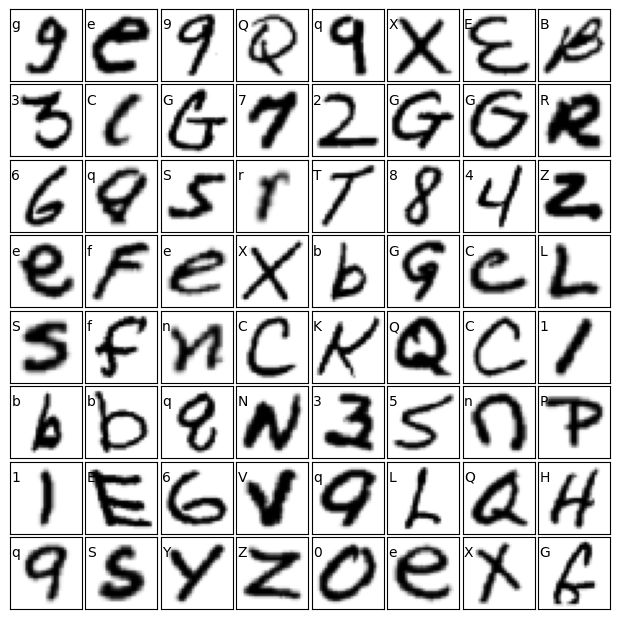

In [36]:
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[]) # grid for each number
    ax.imshow(np.flip(bal_test_im[i]).reshape((28, 28)), cmap='gray_r')
    # label the image with the target value
    ax.text(0, 7, bal_mapa[bal_test_lb[i]])

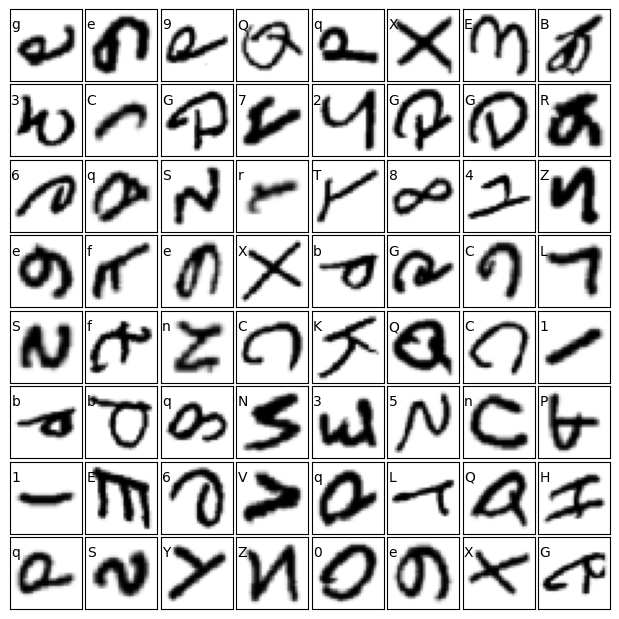

In [10]:
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[]) # grid for each number
    ax.imshow((bal_test_im[i]).reshape((28, 28)), cmap='gray_r')
    # label the image with the target value
    ax.text(0, 7, bal_mapa[bal_test_lb[i]])

### Extensiones

Ejercicios extra para extender

**Ejercicio 6.** Crear datos propios a mano

**Ejercicio 7.** Buscar otras bases de datos

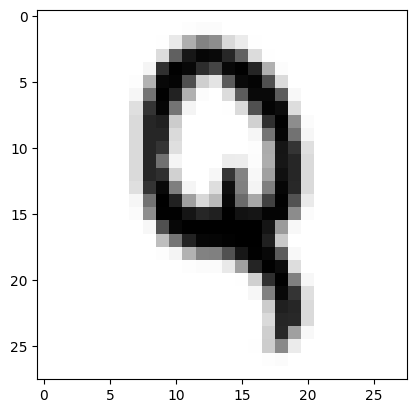

In [32]:
indice_a = bal_test_lb.index(36)
plt.imshow(bal_test_im[indice_a].reshape((28, 28)), cmap='gray_r')